In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("21-housing.csv")

In [4]:
df.head(

)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

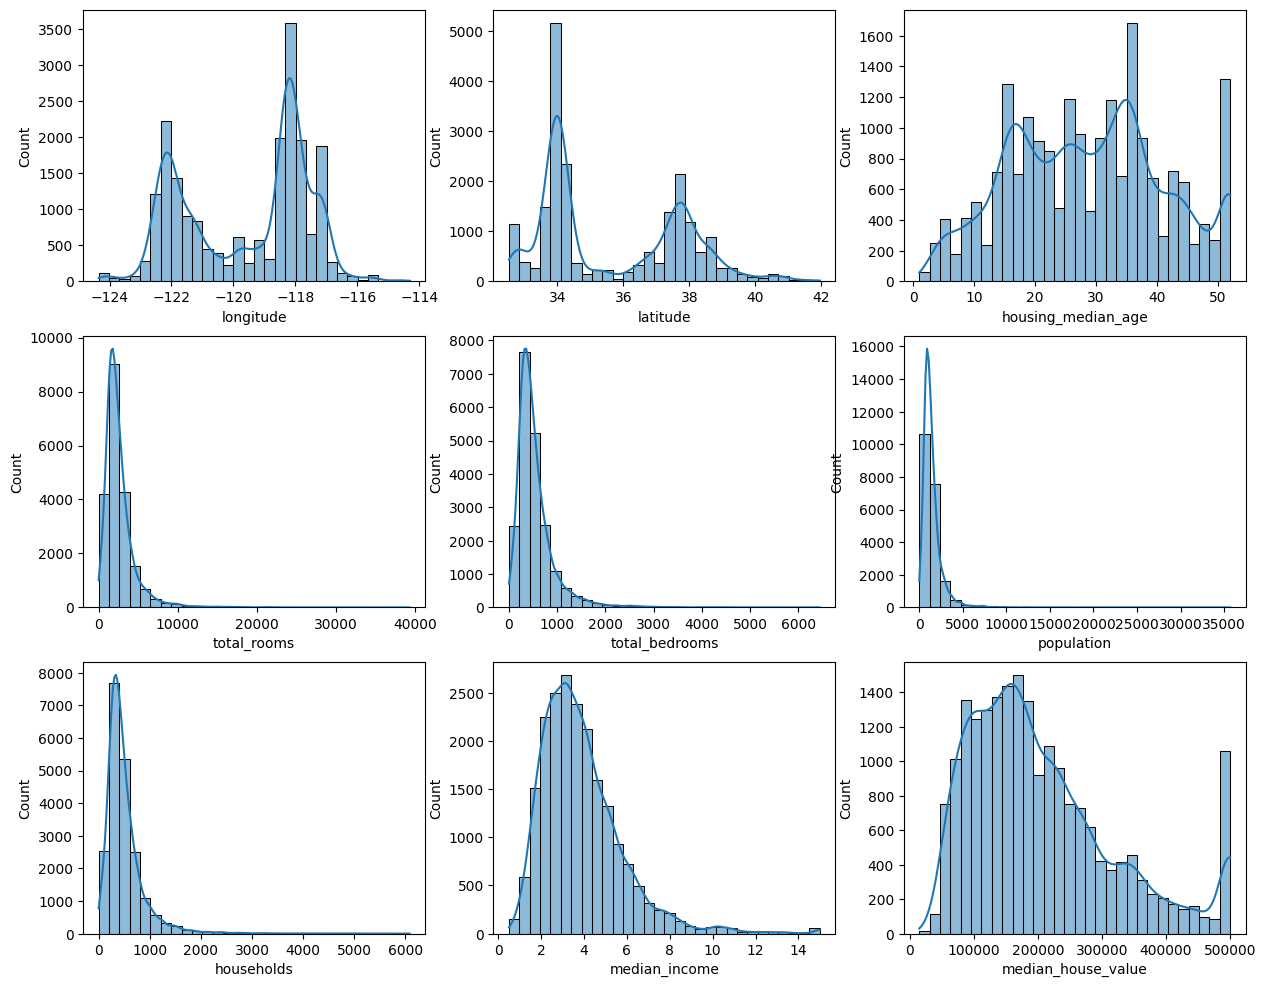

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
for i, col in enumerate(columns):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index, col_index]
    sns.histplot(df, x=col, kde=True, ax=ax, bins=30)
    

<Axes: >

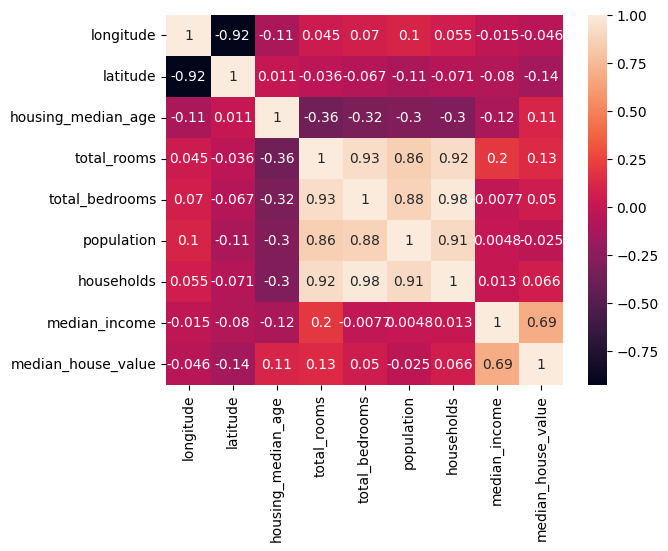

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [11]:
def find_outliers_iqr(df, threshold = 1.5):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float64","int64"]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - IQR*threshold
        upper_bound = Q3 + IQR*threshold

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = {
            "outlier_count": len(outliers),
            "outlier_percentage": 100 * len(outliers) / len(df),
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }
    return pd.DataFrame(outlier_summary)

In [12]:
find_outliers_iqr(df, threshold=1.5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
outlier_count,0.000,0.00,0.0,1287.000000,1271.000000,1196.000000,1220.000000,681.000000,1071.000000
outlier_percentage,0.000,0.00,0.0,6.235465,6.157946,5.794574,5.910853,3.299419,5.188953
lower_bound,-127.485,28.26,-10.5,-1102.625000,-230.500000,-620.000000,-207.500000,-0.706375,-98087.500000
upper_bound,-112.325,43.38,65.5,5698.375000,1173.500000,3132.000000,1092.500000,8.013025,482412.500000


In [13]:
def remove_outliers_from_col(df, target_col, threshold = 1.5):
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - IQR*threshold
    upper_bound = Q3 + IQR*threshold

    return df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]
    

In [14]:
def remove_outliers_from_all(df, threshold = 1.5):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=["float64","int64"]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - IQR*threshold
        upper_bound = Q3 + IQR*threshold

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean.copy()

In [15]:
print(f"original data shape {df.shape}")
df_target_clean = remove_outliers_from_col(df, target_col="median_house_value")
print(f"only target column cleaning shape {df_target_clean.shape}")
df_all_clean = remove_outliers_from_all(df)
print(f"all columns cleaning shape {df_all_clean.shape}")

original data shape (20640, 10)
only target column cleaning shape (19569, 10)
all columns cleaning shape (17446, 10)


In [16]:
df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())

/tmp/ipykernel_3385/3688706348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())


In [17]:
df_target_clean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:
df_target_clean = pd.get_dummies(df_target_clean, columns=["ocean_proximity"], drop_first=True)

In [19]:
df_target_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [20]:
X = df_target_clean.drop("median_house_value", axis=1)
y = df_target_clean["median_house_value"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.3, random_state=15)

In [21]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    print(f"mae: {mae}")
    print(f"mse: {mse}")
    print(f"r2: {r2}")

In [23]:
arr = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), LinearRegression(), Ridge(), Lasso(), KNeighborsRegressor(), DecisionTreeRegressor(), XGBRegressor()]

In [24]:
for model in arr:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("---------------------------------------")
    print(model)
    evaluate_model(y_test, y_pred)

---------------------------------------
RandomForestRegressor()
mae: 29729.427830011922
mse: 1924806242.9416392
r2: 0.7917567144907274
---------------------------------------
AdaBoostRegressor()
mae: 57836.31114593468
mse: 4842356493.408445
r2: 0.47610922943940703
---------------------------------------
GradientBoostingRegressor()
mae: 35162.20222144124
mse: 2430469378.3694396
r2: 0.7370494144346571
---------------------------------------
LinearRegression()
mae: 43594.36386300792
mse: 3453859684.838867
r2: 0.6263296157229503
---------------------------------------
Ridge()
mae: 43597.14291244848
mse: 3453203142.73881
r2: 0.6264006465004597
---------------------------------------
Lasso()
mae: 43594.66878006609
mse: 3453732161.6263247
r2: 0.6263434123598096
---------------------------------------
KNeighborsRegressor()
mae: 69873.33350366207
mse: 7837535751.084373
r2: 0.15206312267157307
---------------------------------------
DecisionTreeRegressor()
mae: 41341.356327712485
mse: 3781983378

In [25]:
params = {
    "learning_rate": [0.01, 0.1],
    "max_depth": [5,8,12,20,30],
    "n_estimators": [100,200,300,500],
    "colsambpl_bytree": [0.3,0.4,0.5,0.7,1]
}

from sklearn.model_selection import RandomizedSearchCV

In [26]:
random = RandomizedSearchCV(XGBRegressor(), param_distributions=params)

In [27]:
random.fit(X_train, y_train)

/home/arda/notebook_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:08:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsambpl_bytree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


KeyboardInterrupt: 

In [ ]:
random.best_params_

{'n_estimators': 500,
 'max_depth': 8,
 'learning_rate': 0.1,
 'colsambpl_bytree': 0.4}

In [ ]:
y_pred = random.predict(X_test)

In [ ]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.81500111615794
27689.92868814938
1709956725.3061633


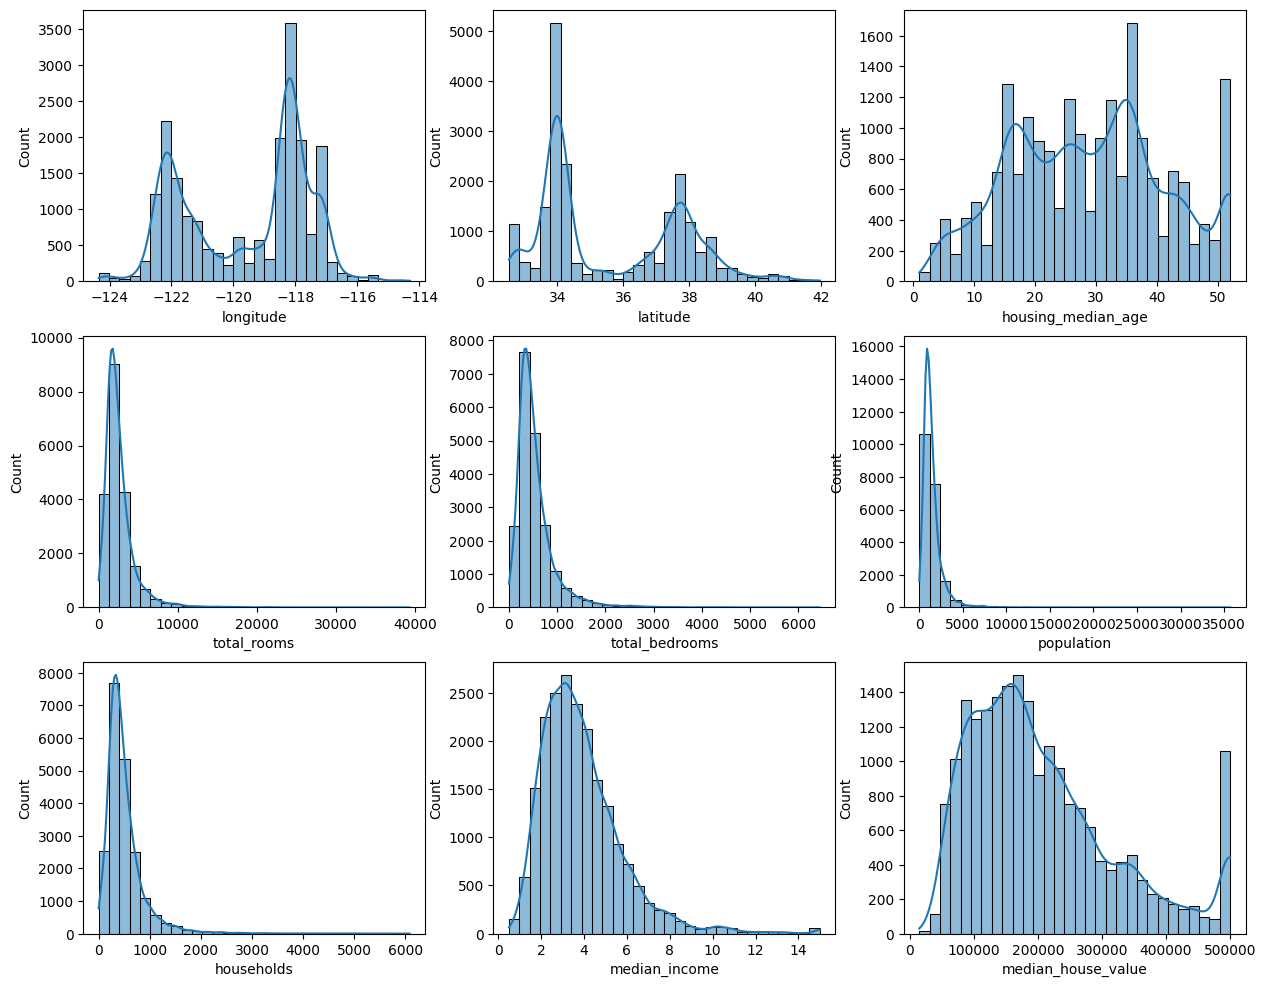

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
for i, col in enumerate(columns):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index, col_index]
    sns.histplot(df, x=col, kde=True, ax=ax, bins=30)
    


In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
pt_X = PowerTransformer(method="yeo-johnson")
X = df_target_clean.drop("median_house_value", axis=1)
y = df_target_clean["median_house_value"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.3, random_state=15)

In [30]:
pt_X = PowerTransformer(method="yeo-johnson")
X_train_transformed = pt_X.fit_transform(X_train)
X_test_transformed = pt_X.transform(X_test)

In [31]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)

In [32]:
from scipy.stats import boxcox
y_train_transformed, lambda_y = boxcox(y_train)

In [33]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ + 1, 1 / lambda_)

In [35]:
model = XGBRegressor()
model.fit(X_train_transformed, y_train_transformed)
y_pred_transformed = model.predict(X_test_transformed)

y_pred = inverse_boxcox(y_pred_transformed, lambda_y)

print(f"r2_score: {r2_score(y_test, y_pred)}")
print(f"rmse: {mean_squared_error(y_test, y_pred) ** 0.5}")

r2_score: 0.7951334289979698
rmse: 43515.45760938261


In [38]:
params = {'n_estimators': [500],
 'max_depth': [8],
 'learning_rate': [0.1],
 'colsambpl_bytree': [0.4]}

In [39]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(estimator=XGBRegressor(), param_grid=params)
model.fit(X_train_transformed, y_train_transformed)
y_pred_transformed = model.predict(X_test_transformed)
y_pred = inverse_boxcox(y_pred_transformed, lambda_y) 
print(f"r2_score: {r2_score(y_test, y_pred)}")
print(f"rmse: {mean_squared_error(y_test, y_pred) ** 0.5}")

/home/arda/notebook_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:15:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsambpl_bytree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arda/notebook_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:15:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsambpl_bytree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arda/notebook_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:15:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsambpl_bytree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arda/notebook_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:15:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsambpl_bytree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arda/notebook_env/lib/python3.12/site-packages

r2_score: 0.8112886389542524
rmse: 41764.47526011248
